# LASSO using SciKit-Learn
----   

## Getting started
Same as before, we will need to import a few Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Next** we will load our data as a Pandas DataFrame.

In [2]:
df = pd.read_csv('data_2.csv', index_col=0)
df.head()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,7.01,5611.90,39356.82,8105.11,56841.94,29884.51,1.92,29526.78,51547.61,37752.29,11.0,10.64,10.47,4.53,10.83,14.5,8.36,312.97,86.03,85.48
2008M02,7.66,6126.16,46946.33,8159.43,62527.78,30304.31,2.01,29943.04,59702.31,45927.67,11.0,10.66,10.32,5.61,11.00,14.5,8.69,335.09,87.23,85.91
2008M03,7.97,6417.48,51150.89,8010.87,63851.12,30615.42,2.05,30246.54,56448.18,42565.17,11.0,10.69,10.18,5.62,11.04,14.5,9.16,348.84,89.00,87.04
2008M04,7.79,7215.71,56174.34,9112.97,70944.49,30763.42,2.03,30399.21,55534.75,43342.70,11.5,11.00,10.27,5.80,11.28,15.0,9.15,358.47,90.83,87.61
2008M05,7.62,7379.67,56240.45,9090.14,69275.97,30831.43,2.10,30467.81,57682.89,46533.13,11.5,11.20,10.60,6.50,11.39,15.0,9.51,371.98,95.32,88.32


In [3]:
df.shape

(120, 20)

## Let's try to model the Rand exchange rate   

Now that we have thinned out our DataFrame, let's see what we can do with machine learning.   
   

In [4]:
X = df.drop('ZAR/USD', axis=1)
y = df['ZAR/USD']

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
X_scaled = scaler.fit_transform(X)

In [8]:
X_standardize = pd.DataFrame(X_scaled,columns=X.columns)
X_standardize.head()

,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
0,-1.341230,-1.820002,0.205077,-1.124305,-2.145276,-0.740237,-2.040128,0.325086,-0.356166,2.195535,2.098427,2.225653,0.692028,2.036107,2.195535,-0.234691,2.625151,-1.613707,-1.690995
1,-0.934909,-1.404295,0.248319,-0.821735,-2.057421,-0.739864,-1.936778,2.106157,1.670410,2.195535,2.108767,2.136289,1.529205,2.124739,2.195535,0.294266,2.985518,-1.567326,-1.667091
2,-0.704734,-1.173995,0.130057,-0.751314,-1.992313,-0.739698,-1.861424,1.395422,0.836888,2.195535,2.124275,2.052883,1.536956,2.145593,2.195535,1.047628,3.209525,-1.498915,-1.604276
3,-0.074046,-0.898842,1.007391,-0.373843,-1.961339,-0.739781,-1.823519,1.195919,1.029628,2.452574,2.284533,2.106501,1.676486,2.270721,2.452574,1.031600,3.366412,-1.428184,-1.572591
4,0.055500,-0.895220,0.989217,-0.462633,-1.947106,-0.739490,-1.806486,1.665095,1.820496,2.452574,2.387925,2.303101,2.219101,2.328071,2.452574,1.608643,3.586510,-1.254644,-1.533123


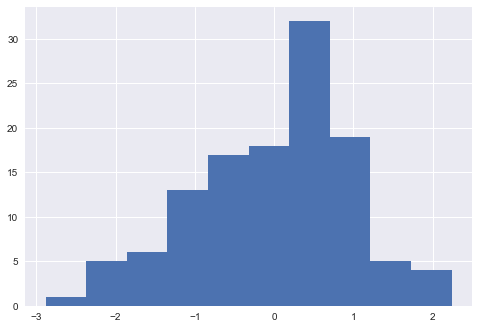

In [9]:
plt.hist(X_standardize['Value of Exports (USD)'])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, 
                                                    y, 
                                                    test_size=0.20, 
                                                    shuffle=False)

In [12]:
from sklearn.linear_model import Lasso

In [27]:
lasso = Lasso(alpha=0.01)

In [28]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
b = float(lasso.intercept_)

In [30]:
a = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

In [31]:
print("Intercept:", float(b))

Intercept: 10.043117246931184


In [32]:
a

,Coefficient
Value of Exports (USD),-0.542056
Value of Exports (ZAR),1.070156
Value of Imports (USD),-0.830049
Value of Imports (ZAR),1.188285
Total Reserves excl Gold (USD),0.000000
IMF Reserve Position (USD),0.000000
Foreign Exchange (USD),0.065942
Claims on Non-residents (USD),0.000000
Liabilities to Non-residents (USD),0.024812
Central Bank Policy Rate,0.000000


In [33]:
from sklearn import metrics

In [34]:
train_lasso = lasso.predict(X_train)

print('MSE (train)')
print('Linear:', metrics.mean_squared_error(y_train, train_lasso))

MSE (train)
Linear: 0.0466723532958


In [35]:
test_lasso = lasso.predict(X_test)

print('MSE (test)')
print('Linear:', metrics.mean_squared_error(y_test, test_lasso))

MSE (test)
Linear: 0.586468324859


In [36]:
# we want to plot the train and test response variables as a continuous line
train_plot = y_train.append(pd.Series(y_test[0], index=['2016M01']))

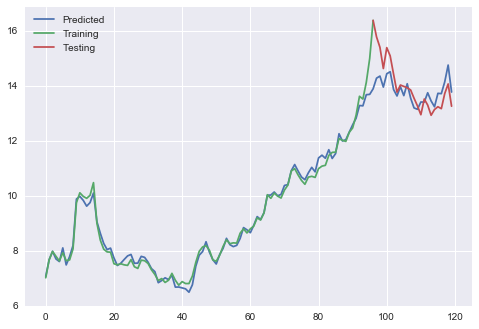

In [37]:
plt.plot(np.arange(len(y)), lasso.predict(X_standardize), label='Predicted')
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()

plt.show()